##### *Written By: Harshwardhan Bhakkad, IIT Guwahati CSE`24 200101040*

# Chebyshev Polynomials: A Powerful Tool for Signal Approximation
### Welcome to this tutorial on Chebyshev polynomials and their applications in signal processing!
In this notebook, we will explore the usefulness of Chebyshev polynomials and demonstrate their application in a real-world scenario: **ECG signal denoising**. We'll use Python code and markdown explanations to guide you through the process.

Chebyshev Polynomials are a sequence of orthogonal polynomials that are widely used in numerical mathematics, particularly in approximation theory, numerical integration, and solving differential equations. They are named after Pafnuty Chebyshev, a Russian mathematician. 

There are two kinds of Chebyshev polynomials, often referred to as the first kind (T_n) and the second kind (U_n). They are defined on the interval [-1, 1] and exhibit a number of interesting properties, including the fact that the roots of these polynomials are the extrema of the corresponding cosine function.

These polynomials are particularly useful in function approximation because of a property known as the Chebyshev equioscillation theorem. This theorem essentially states that the best approximation to a function on a given interval by a polynomial of a certain degree is unique and can be given by a Chebyshev polynomial.

## Python Implementation
Let's first implement the necessary Python functions to work with Chebyshev polynomials. We'll use the code you provided as a starting point:

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Chebyshev as T

## Chebyshev Polynomials of the first kind

Chebyshev polynomials of the first kind are defined by the recurrence relation:

T_0(x) = 1
T_1(x) = x
T_{n+1}(x) = 2xT_n(x) - T_{n-1}(x)

Let's plot the first few Chebyshev polynomials of the first kind.



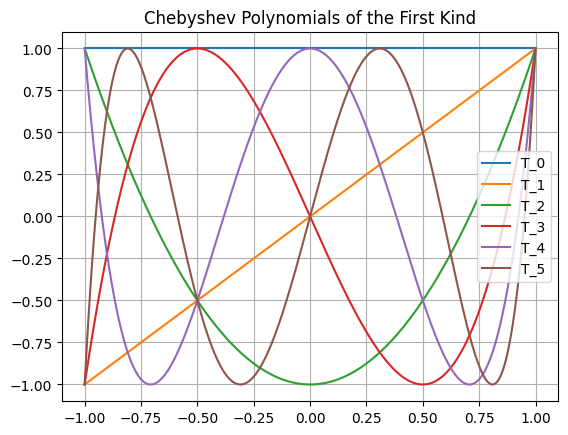

In [2]:
# Plotting Chebyshev Polynomials of the first kind
x = np.linspace(-1, 1, 1000)
for i in range(6):
    coeffs = [0]*i + [1]
    plt.plot(x, T(coeffs, domain=[-1, 1])(x), label="T_%d" % i)
plt.legend()
plt.title("Chebyshev Polynomials of the First Kind")
plt.grid(True)
plt.show()

## Chebyshev Polynomials of the second kind

Chebyshev polynomials of the second kind are defined by the recurrence relation:

U_0(x) = 1
U_1(x) = 2x
U_{n+1}(x) = 2xU_n(x) - U_{n-1}(x)

Let's plot the first few Chebyshev polynomials of the second kind.

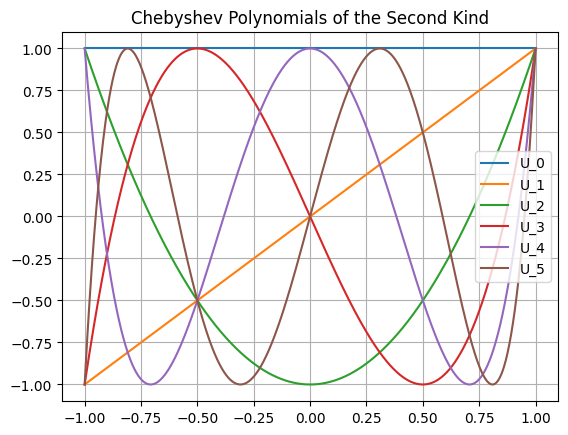

In [3]:
# Plotting Chebyshev Polynomials of the second kind
from numpy.polynomial import chebyshev as C
for i in range(6):
    coeffs = [0]*i + [1]
    plt.plot(x, C.chebval(x, coeffs), label="U_%d" % i)
plt.legend()
plt.title("Chebyshev Polynomials of the Second Kind")
plt.grid(True)
plt.show()

# Sample Signal and Chebyshev Polynomial Evaluation

Let's consider a sample signal, which could be any time-series data, such as a sound wave, a radio signal, or a stock price over time. 

The Chebyshev polynomial can be used to approximate this signal. The idea is to find the Chebyshev polynomial that best fits the signal. This is done by minimizing the maximum absolute error between the signal and the polynomial (this is known as a minimax approximation).

The Chebyshev polynomial of degree `n` is defined by the recurrence relation:

T_0(x) = 1
T_1(x) = x
T_{n+1}(x) = 2xT_n(x) - T_{n-1}(x)

To evaluate the Chebyshev polynomial on the sample signal, we first normalize the signal to the interval [-1, 1], which is the domain of the Chebyshev polynomial. Then, we compute the values of the polynomial at the points corresponding to the signal. 

The result is a new signal that approximates the original signal. The degree of the polynomial determines the accuracy of the approximation: the higher the degree, the closer the approximation to the original signal.

This process is useful in many applications, such as data compression, noise reduction, and solving differential equations.

In [4]:
# Function to calculate Chebyshev polynomial of order n
def chebyshev_poly(x, n):
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return x
    else:
        return 2 * x * chebyshev_poly(x, n - 1) - chebyshev_poly(x, n - 2)

# Function to fit the Chebyshev polynomial coefficients
def cheb_fit(x, y, order):
    A = np.zeros((len(x), order + 1))
    A[:, 0] = 1
    if order > 0:
        A[:, 1] = x
    for i in range(1, order):
        A[:, i+1] = 2 * x * A[:, i] - A[:, i-1]
    coeffs = np.linalg.lstsq(A, y, rcond=None)[0]
    return coeffs

# Function to evaluate the Chebyshev polynomial
def cheb_eval(x, coeffs):
    y = np.zeros_like(x)
    for i, coeff in enumerate(coeffs):
        y += coeff * chebyshev_poly(x, i)
    return y

### Approximating a Sample Signal
   
Let's illustrate the approximation capabilities of Chebyshev polynomials using a sample signal:

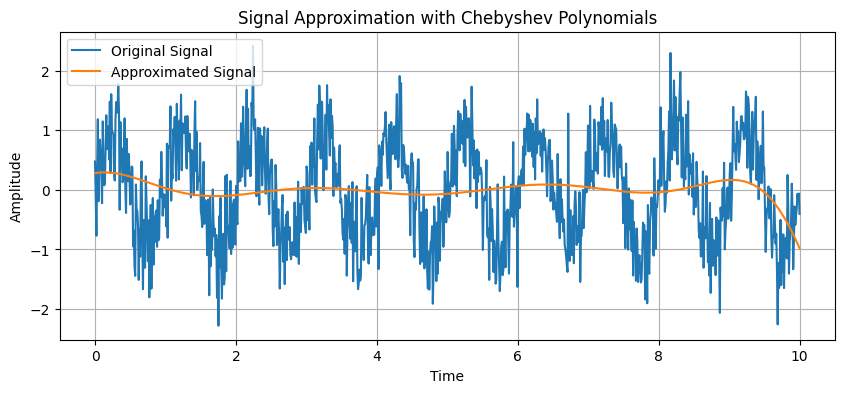

In [5]:
# Generate sample data
t = np.linspace(0, 10, 1000)
signal_data = np.sin(2 * np.pi * t) + np.random.normal(0, 0.5, t.shape)

# Define Chebyshev polynomial order
order = 10

# Fit the Chebyshev polynomial to the signal data
cheb_coeffs = cheb_fit(t, signal_data, order)

# Evaluate the Chebyshev polynomial
approx_signal = cheb_eval(t, cheb_coeffs)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(t, signal_data, label='Original Signal')
plt.plot(t, approx_signal, label='Approximated Signal')
plt.title('Signal Approximation with Chebyshev Polynomials')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

This code snippet generates a noisy sine wave and approximates it using a Chebyshev polynomial of order 10. The plot will demonstrate how well the polynomial captures the underlying trend of the signal.

## Real-World Application: ECG Signal Denoising
Electrocardiogram (ECG) signals measure the electrical activity of the heart. However, these signals are often corrupted by noise from various sources. Chebyshev polynomials can be used to effectively remove this noise and extract the clean ECG signal.
### Simulating a Noisy ECG Signal
For this example, we will simulate a noisy ECG signal. However, you can replace this with a real ECG dataset if available.

### Generating a Simulated ECG Signal
To demonstrate ECG denoising using Chebyshev polynomials, we'll first need a simulated ECG signal. While libraries like biosppy offer pre-recorded ECG data, creating our own allows for greater control and customization. Below, we'll utilize the scipy library to construct a basic ECG waveform:

In [6]:
from scipy.signal import sawtooth, square

def generate_ecg(time, heart_rate, noise_level=0):
    """
    Generates a simulated ECG signal.

    Args:
        time (array_like): Time points for the signal.
        heart_rate (float): Heart rate in beats per minute (BPM).
        noise_level (float, optional): Standard deviation of added Gaussian noise. Defaults to 0.

    Returns:
        array_like: The simulated ECG signal.
    """
    # Calculate time period and frequency
    period = 60.0 / heart_rate
    freq = 1.0 / period

    # Generate P wave
    p_wave = 0.2 * sawtooth(2 * np.pi * freq * time, width=0.3)

    # Generate QRS complex
    qrs_complex = 1.0 * square(2 * np.pi * freq * time, duty=0.05)

    # Generate T wave
    t_wave = 0.3 * sawtooth(2 * np.pi * freq * time - np.pi, width=0.5)

    # Combine waves and add noise
    ecg = p_wave + qrs_complex + t_wave + np.random.normal(0, noise_level, len(time))

    return ecg

# Example usage
time = np.linspace(0, 10, 2000)  # 5 seconds of signal
heart_rate = 72  # Beats per minute
ecg_clean = generate_ecg(time, heart_rate)

# Add noise to the clean ECG
noise_level = 0.1
ecg_noisy = generate_ecg(time, heart_rate, noise_level)

- **Waveforms:** The function generates three basic ECG waveforms: P wave, QRS complex, and T wave. These are created using scipy.signal's sawtooth and square functions, mimicking the characteristic shapes of ECG components.

- **Heart Rate:** The heart_rate parameter controls the frequency of the waveforms, influencing the spacing between PQRST complexes.

- **Noise:** The noise_level parameter allows for the addition of Gaussian noise to simulate real-world ECG recordings.

- **Combination:** The individual waveforms are combined to form the complete ECG signal.

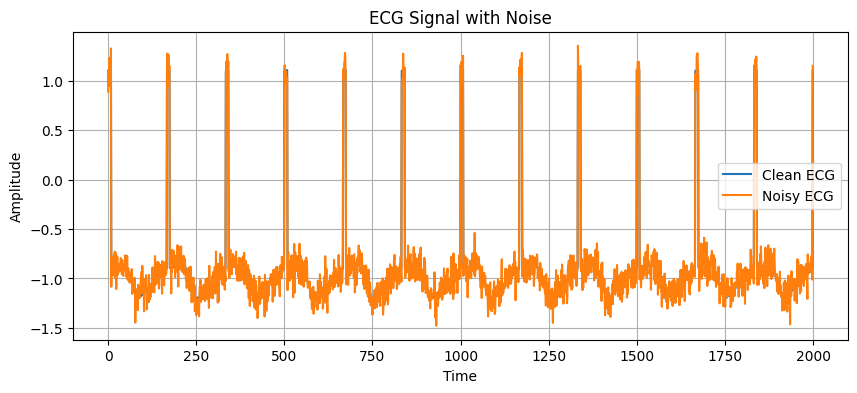

In [7]:

# Plot the clean and noisy ECG signals
plt.figure(figsize=(10, 4))
plt.plot(ecg_clean, label='Clean ECG')
plt.plot(ecg_noisy, label='Noisy ECG')
plt.title('ECG Signal with Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

## ECG Denoising with Chebyshev Polynomials
Now that we have our simulated ECG signals (both clean and noisy), let's implement the denoising process using Chebyshev polynomials.

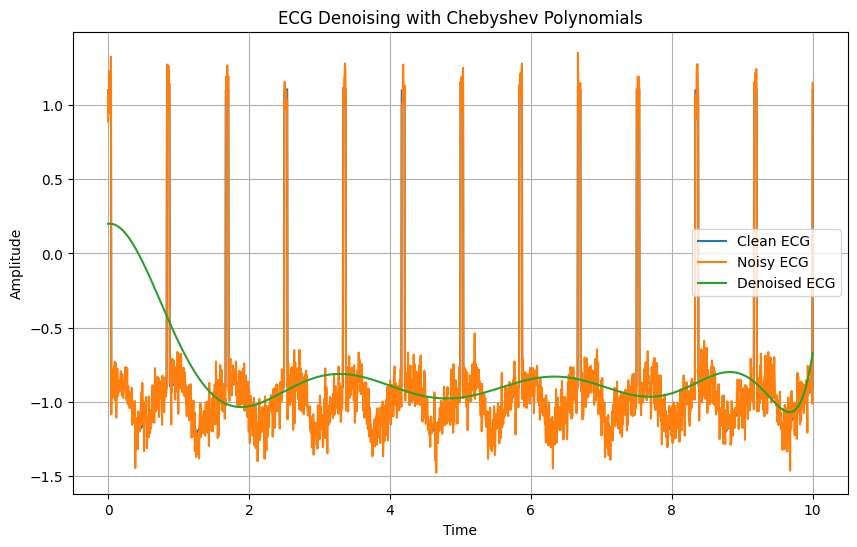

In [8]:
# Define Chebyshev polynomial order
order = 10  # Adjust the order as needed

# Fit Chebyshev polynomial to the noisy ECG signal
cheb_coeffs = cheb_fit(time, ecg_noisy, order)

# Reconstruct the denoised ECG signal
ecg_denoised = cheb_eval(time, cheb_coeffs)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, ecg_clean, label='Clean ECG')
plt.plot(time, ecg_noisy, label='Noisy ECG')
plt.plot(time, ecg_denoised, label='Denoised ECG')
plt.title('ECG Denoising with Chebyshev Polynomials')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

- **Order Selection:** The order parameter controls the complexity of the Chebyshev approximation. Higher orders can capture finer details but may also lead to overfitting the noise. Experiment with different values to find the optimal balance for your signal.
- **Fitting:** We use the cheb_fit function to determine the Chebyshev coefficients that best represent the noisy ECG signal.
- **Reconstruction:** The cheb_eval function reconstructs a denoised ECG signal using the fitted coefficients.
- **Visualization:** We plot the clean, noisy, and denoised ECG signals to visually assess the effectiveness of the denoising process.

Further Exploration:

- Real-world ECG Datasets: Explore publicly available ECG datasets to test and refine your denoising techniques on diverse and realistic data.
- Advanced Denoising Techniques: Investigate more sophisticated methods like wavelet denoising or machine learning-based approaches for further noise reduction.
- ECG Feature Extraction: Once denoised, extract relevant features from the ECG signal for tasks like heartbeat detection, arrhythmia classification, or heart rate variability analysis.

Here's an example code snippet demonstrating how to calculate SNR(Signal to Noise ratio) for performance evaluation:


In [9]:
def signal_to_noise_ratio(original_signal, denoised_signal):
    noise = original_signal - denoised_signal
    noise_power = np.mean(noise ** 2)
    signal_power = np.mean(original_signal ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Example usage
snr = signal_to_noise_ratio(ecg_clean, ecg_denoised)
print("SNR:", snr)

SNR: 5.597552024900333
